<a href="https://colab.research.google.com/github/Chenyuju/chen/blob/master/Regression(Abalone).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [360]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar -xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark

In [444]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [0]:
import findspark
findspark.init("spark-2.4.5-bin-hadoop2.7")
import pyspark

In [0]:
from pyspark.sql import SparkSession
    
spark = SparkSession.builder.master('local[*]').getOrCreate()

In [0]:
from pyspark.ml.linalg import Vectors
from pyspark.ml import Pipeline
from pyspark.ml.feature import IndexToString,StringIndexer, VectorIndexer
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator

In [0]:
from pyspark.ml.regression import DecisionTreeRegressor, RandomForestRegressor, GBTRegressor
from pyspark.ml.regression import IsotonicRegression

import sklearn.metrics
import matplotlib.pyplot as plt 
import numpy as np  

In [0]:
import findspark
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

In [0]:
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")

In [0]:
#~# Advertising Dataset #~# #~# Advertising Dataset #~# #~# Advertising Dataset #~# #~# Advertising Dataset #~# #~# Advertising Dataset #~#

+-----+-----+---------+-----+
|   TV|Radio|Newspaper|Sales|
+-----+-----+---------+-----+
|230.1| 37.8|     69.2| 22.1|
| 44.5| 39.3|     45.1| 10.4|
| 17.2| 45.9|     69.3|  9.3|
|151.5| 41.3|     58.5| 18.5|
|180.8| 10.8|     58.4| 12.9|
|  8.7| 48.9|     75.0|  7.2|
| 57.5| 32.8|     23.5| 11.8|
|120.2| 19.6|     11.6| 13.2|
|  8.6|  2.1|      1.0|  4.8|
|199.8|  2.6|     21.2| 10.6|
+-----+-----+---------+-----+
only showing top 10 rows



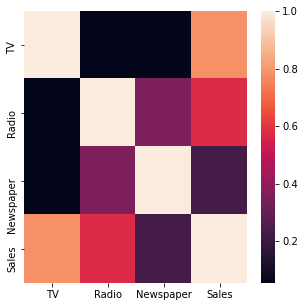

In [453]:
#~# Advertising Dataset #~#

Advertising_csv = spark.read.format('com.databricks.spark.csv').\
                              options(header='true', \
                              inferschema='true') \
                .load("/content/sample_data/Advertising.csv",header=True);

Advertising_csv.show(10)

from pyspark.ml.stat import Correlation

data_ad = pd.read_csv('/content/sample_data/Advertising.csv')
plt.figure(figsize=(5,5)) 
sns.heatmap(data_ad.corr())

In [454]:
#~# Advertising Dataset #~#

import six
for i in Advertising_csv.columns:
    if not( isinstance(Advertising_csv.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to Sales for ", i, "\t", Advertising_csv.stat.corr('Sales',i))

Correlation to Sales for  TV 	 0.7822244248616067
Correlation to Sales for  Radio 	 0.5762225745710555
Correlation to Sales for  Newspaper 	 0.22829902637616545
Correlation to Sales for  Sales 	 1.0


In [455]:
#~# Advertising Dataset #~#

def transData_ad(data):
  return data.rdd.map(lambda r: [Vectors.dense(r[:-1]),r[-1]]).toDF(['features','label'])   

transformed_ad = transData_ad(Advertising_csv)

trainingData_ad, testData_ad = transformed_ad.randomSplit([0.7, 0.3], seed = 100)
#transformed.sample(False, 0.1, 123).show(10)

transformed_ad.show(10)
Advertising_csv.count(),trainingData_ad.count(),testData_ad.count()

+-----------------+-----+
|         features|label|
+-----------------+-----+
|[230.1,37.8,69.2]| 22.1|
| [44.5,39.3,45.1]| 10.4|
| [17.2,45.9,69.3]|  9.3|
|[151.5,41.3,58.5]| 18.5|
|[180.8,10.8,58.4]| 12.9|
|  [8.7,48.9,75.0]|  7.2|
| [57.5,32.8,23.5]| 11.8|
|[120.2,19.6,11.6]| 13.2|
|    [8.6,2.1,1.0]|  4.8|
| [199.8,2.6,21.2]| 10.6|
+-----------------+-----+
only showing top 10 rows



(200, 141, 59)

In [0]:
#~# Advertising Dataset #~#

labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(transformed_ad)
featureIndexer = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(transformed_ad)
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel", labels=labelIndexer.labels)

evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")

Decision Tree (RMSE) = 0.937179
DecisionTreeRegressionModel (uid=DecisionTreeRegressor_3396b8d62420) of depth 8 with 231 nodes
+-----+------------------+
|label|        prediction|
+-----+------------------+
|  6.7|               6.6|
|  7.6|               7.0|
|  9.2|               8.8|
|  9.5|               9.6|
| 10.1|              10.1|
| 11.6|10.900000000000002|
|  9.7|               9.7|
|  8.6|               9.3|
| 14.6|14.700000000000003|
| 13.3|12.899999999999999|
+-----+------------------+
only showing top 10 rows



TypeError: ignored

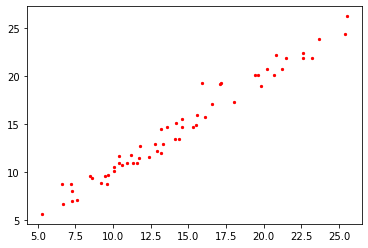

In [457]:
#~# Advertising Dataset #~#

dt = DecisionTreeRegressor(featuresCol="indexedFeatures", impurity='variance', maxDepth=8)

pipeline_dt = Pipeline(stages=[featureIndexer, dt])
model_dt = pipeline_dt.fit(trainingData_ad)
predictions_dt = model_dt.transform(testData_ad)

rmse_dt = evaluator.evaluate(predictions_dt)

print("Decision Tree (RMSE) = %g" % rmse_dt)

treeModel_dt = model_dt.stages[1]
print(treeModel_dt)
predictions_dt.select("label", "prediction").sample(False, 0.5, 123).show(10)

y_true = predictions_dt.select("label").toPandas()
y_pred = predictions_dt.select("prediction").toPandas()

plt.scatter(y_true, y_pred, color = 'red', s=5)

plt.plot(testData_ad['label'], predictions_dt,'-', color=sns.xkcd_rgb['carmine'])

plt.title("Decision Tree_Advertising")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

Random Forest Tree (RMSE) = 1.46424
RandomForestRegressionModel (uid=RandomForestRegressor_1d7de580f3de) with 80 trees
+-----+------------------+
|label|        prediction|
+-----+------------------+
|  9.5| 9.788833333333333|
|  9.7| 10.28041666666667|
| 13.3|13.130083333333332|
| 11.7|12.721857026143784|
| 21.2|19.709978174603183|
| 19.4| 19.26609722222222|
| 23.2|18.697750000000003|
| 20.2| 19.02500000000001|
| 16.1|15.491723214285718|
+-----+------------------+



Text(0, 0.5, 'Predicted Values')

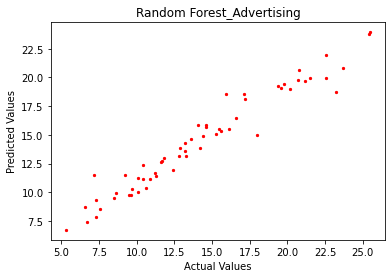

In [458]:
#~# Advertising Dataset #~#

rf = RandomForestRegressor(featuresCol="indexedFeatures", maxDepth=10, numTrees=80)

pipeline_rf = Pipeline(stages=[featureIndexer, rf])
model_rf = pipeline_rf.fit(trainingData_ad)
predictions_rf = model_rf.transform(testData_ad)

rmse_rf = evaluator.evaluate(predictions_rf)

print("Random Forest Tree (RMSE) = %g" % rmse_rf)

treeModel_rf = model_rf.stages[1]
print(treeModel_rf)
predictions_rf.select("label", "prediction").sample(False, 0.15, 123).show(10)

y_true = predictions_rf.select("label").toPandas()
y_pred = predictions_rf.select("prediction").toPandas()

plt.scatter(y_true, y_pred, color = 'red', s=5)

plt.title("Random Forest_Advertising")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

Gradient Boosted Tree (RMSE) = 1.04325
GBTRegressionModel (uid=GBTRegressor_6299eb8f016f) with 40 trees
+-----+------------------+
|label|        prediction|
+-----+------------------+
|  6.7| 6.349044838628282|
|  7.6| 6.399239784907967|
|  9.2| 9.791619956452369|
|  9.5| 9.071615308073522|
| 10.1| 9.569381551341293|
| 11.6|12.225133437759697|
|  9.7| 9.339679494965742|
|  8.6| 9.695862243289781|
| 14.6|16.476178125161578|
| 13.3|12.555742928960656|
+-----+------------------+
only showing top 10 rows



Text(0, 0.5, 'Predicted Values')

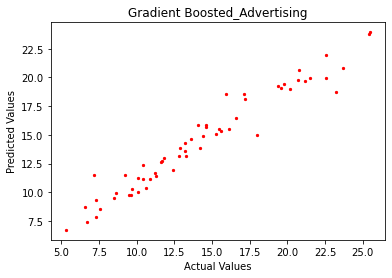

In [459]:
#~# Advertising Dataset #~#

gbt = GBTRegressor(featuresCol="indexedFeatures", maxIter=40, lossType='squared', featureSubsetStrategy='all')

pipeline_gbt = Pipeline(stages=[featureIndexer, gbt])
model_gbt = pipeline_gbt.fit(trainingData_ad)
predictions_gbt = model_gbt.transform(testData_ad)

rmse_gbt = evaluator.evaluate(predictions_gbt)

print("Gradient Boosted Tree (RMSE) = %g" % rmse_gbt)

treeModel_gbt = model_gbt.stages[1]
print(treeModel_gbt)
predictions_gbt.select("label", "prediction").sample(False, 0.5, 123).show(10)

plt.scatter(y_true, y_pred, color = 'red', s=5)

plt.title("Gradient Boosted_Advertising")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

Isotonic Regression (RMSE) = 3.18704
+-----+------------------+
|label|        prediction|
+-----+------------------+
|  6.7|              7.62|
|  7.6|              7.62|
|  9.2|              7.62|
|  9.5| 8.844444444444445|
| 10.1| 9.444444444444445|
| 11.6| 9.444444444444445|
|  9.7|              10.4|
|  8.6|              10.4|
| 14.6|10.842105263157892|
| 13.3|10.842105263157892|
+-----+------------------+
only showing top 10 rows



Text(0, 0.5, 'Predicted Values')

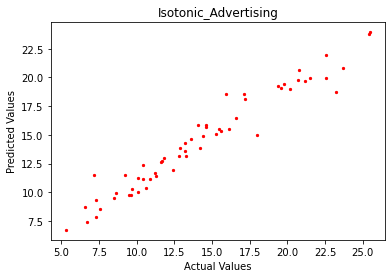

In [460]:
#~# Advertising Dataset #~#

iso = IsotonicRegression(featuresCol="indexedFeatures", isotonic=True)

pipeline_iso = Pipeline(stages=[featureIndexer, iso])
model_iso = pipeline_iso.fit(trainingData_ad)
predictions_iso = model_iso.transform(testData_ad)

rmse_iso = evaluator.evaluate(predictions_iso)

print("Isotonic Regression (RMSE) = %g" % rmse_iso)

predictions_iso.select("label", "prediction").sample(False, 0.5, 123).show(10)

plt.scatter(y_true, y_pred, color = 'red', s=5)

plt.title("Isotonic_Advertising")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [0]:
#~# Advertising Dataset #~# #~# Advertising Dataset #~# #~# Advertising Dataset #~# #~# Advertising Dataset #~# 

In [0]:
#~# Abalone Dataset #~# #~# Abalone Dataset #~# #~# Abalone Dataset #~# #~# Abalone Dataset #~# #~# Abalone Dataset #~#

+---+------+--------+------+------------+--------------+--------------+------------+-----+
|Sex|Length|Diameter|Height|Whole weight|Shucked weight|Viscera weight|Shell weight|Rings|
+---+------+--------+------+------------+--------------+--------------+------------+-----+
|  1| 0.455|   0.365| 0.095|       0.514|        0.2245|         0.101|        0.15|   15|
|  1|  0.35|   0.265|  0.09|      0.2255|        0.0995|        0.0485|        0.07|    7|
|  2|  0.53|    0.42| 0.135|       0.677|        0.2565|        0.1415|        0.21|    9|
|  1|  0.44|   0.365| 0.125|       0.516|        0.2155|         0.114|       0.155|   10|
|  0|  0.33|   0.255|  0.08|       0.205|        0.0895|        0.0395|       0.055|    7|
|  0| 0.425|     0.3| 0.095|      0.3515|         0.141|        0.0775|        0.12|    8|
|  2|  0.53|   0.415|  0.15|      0.7775|         0.237|        0.1415|        0.33|   20|
|  2| 0.545|   0.425| 0.125|       0.768|         0.294|        0.1495|        0.26|   16|

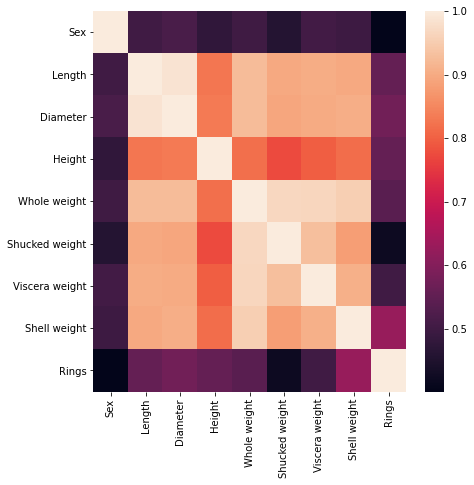

In [463]:
#~# Abalone Dataset #~#

Abalone_csv = spark.read.format('com.databricks.spark.csv').\
                              options(header='true', \
                              inferschema='true') \
                .load("/content/sample_data/abalone.csv",header=True);

Abalone_csv.show(10)

from pyspark.ml.stat import Correlation

data_ab = pd.read_csv('/content/sample_data/abalone.csv')
plt.figure(figsize=(7,7)) 
sns.heatmap(data_ab.corr())

In [464]:
#~# Abalone Dataset #~#

import six
for i in Abalone_csv.columns:
    if not( isinstance(Abalone_csv.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to Rings for ", i, "\t", Abalone_csv.stat.corr('Rings',i))

Correlation to Rings for  Sex 	 0.4014447499630559
Correlation to Rings for  Length 	 0.5567195769296179
Correlation to Rings for  Diameter 	 0.5746598513059199
Correlation to Rings for  Height 	 0.5574673244580345
Correlation to Rings for  Whole weight 	 0.5403896769238994
Correlation to Rings for  Shucked weight 	 0.4208836579452148
Correlation to Rings for  Viscera weight 	 0.5038192487597699
Correlation to Rings for  Shell weight 	 0.6275740445103176
Correlation to Rings for  Rings 	 1.0


In [465]:
#~# Abalone Dataset #~#

def transData_ab(data):
  return data.rdd.map(lambda r: [Vectors.dense(r[:-1]),r[-1]]).toDF(['features','label']) 
  
transformed_ab = transData_ab(Abalone_csv)

trainingData_ab, testData_ab = transformed_ab.randomSplit([0.7, 0.3], seed = 100)
#transformed.sample(False, 0.1, 123).show(10)

transformed_ab.show(10)
Abalone_csv.count(),trainingData_ab.count(),testData_ab.count()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[1.0,0.455,0.365,...|   15|
|[1.0,0.35,0.265,0...|    7|
|[2.0,0.53,0.42,0....|    9|
|[1.0,0.44,0.365,0...|   10|
|[0.0,0.33,0.255,0...|    7|
|[0.0,0.425,0.3,0....|    8|
|[2.0,0.53,0.415,0...|   20|
|[2.0,0.545,0.425,...|   16|
|[1.0,0.475,0.37,0...|    9|
|[2.0,0.55,0.44,0....|   19|
+--------------------+-----+
only showing top 10 rows



(4177, 2957, 1220)

In [0]:
#~# Abalone Dataset #~#

labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(transformed_ab)
featureIndexer = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(transformed_ab)
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel", labels=labelIndexer.labels)

Decision Tree (RMSE) = 2.3651
DecisionTreeRegressionModel (uid=DecisionTreeRegressor_2a4b01c17786) of depth 7 with 227 nodes
+-----+------------------+
|label|        prediction|
+-----+------------------+
|    4|4.3061224489795915|
|    7|               6.0|
|    6| 5.955223880597015|
|    7| 5.955223880597015|
|    6| 5.955223880597015|
|    9| 6.602564102564102|
|    7| 6.602564102564102|
|    7| 6.778846153846154|
|    7| 6.602564102564102|
|    7| 6.778846153846154|
+-----+------------------+
only showing top 10 rows



Text(0, 0.5, 'Predicted Values')

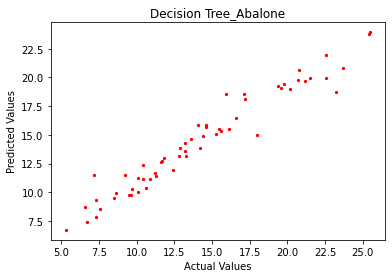

In [467]:
#~# Abalone Dataset #~#

dt = DecisionTreeRegressor(featuresCol="indexedFeatures", maxDepth=7)

pipeline_dt = Pipeline(stages=[featureIndexer, dt])
model_dt = pipeline_dt.fit(trainingData_ab)
predictions_dt = model_dt.transform(testData_ab)

rmse_dt = evaluator.evaluate(predictions_dt)

print("Decision Tree (RMSE) = %g" % rmse_dt)

treeModel_dt = model_dt.stages[1]
print(treeModel_dt)
predictions_dt.select("label", "prediction").sample(False, 0.1, 123).show(10)

y_true = predictions_rf.select("label").toPandas()
y_pred = predictions_rf.select("prediction").toPandas()

plt.scatter(y_true, y_pred, color = 'red', s=5)

plt.title("Decision Tree_Abalone")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

Random Forest Tree (RMSE) = 2.2773
RandomForestRegressionModel (uid=RandomForestRegressor_65c8473fdef3) with 50 trees
+-----+------------------+
|label|        prediction|
+-----+------------------+
|    4| 4.328174940544755|
|    7| 5.049478264614556|
|    6| 5.598596471927232|
|    7| 6.576521602381061|
|    6|6.0781894979992215|
|    9|  6.78708881463684|
|    7| 6.745994530731452|
|    7| 6.806550273332549|
|    7| 6.826470025618932|
|    7|6.8347432088057705|
+-----+------------------+
only showing top 10 rows



Text(0, 0.5, 'Predicted Values')

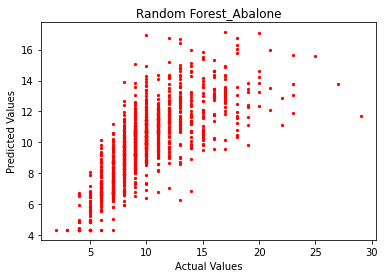

In [468]:
 #~# Abalone Dataset #~#

rf = RandomForestRegressor(featuresCol="indexedFeatures", maxDepth=10, numTrees=50)

pipeline_rf = Pipeline(stages=[featureIndexer, rf])
model_rf = pipeline_rf.fit(trainingData_ab)
predictions_rf = model_rf.transform(testData_ab)

rmse_rf = evaluator.evaluate(predictions_rf)

print("Random Forest Tree (RMSE) = %g" % rmse_rf)

treeModel_rf = model_rf.stages[1]
print(treeModel_rf)
predictions_rf.select("label", "prediction").sample(False, 0.1, 123).show(10)

y_true = predictions_rf.select("label").toPandas()
y_pred = predictions_rf.select("prediction").toPandas()

plt.scatter(y_true, y_pred, color = 'red', s=5)

plt.title("Random Forest_Abalone")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

Gradient Boosted Tree (RMSE) = 2.32878
GBTRegressionModel (uid=GBTRegressor_fc66967b1819) with 30 trees
+-----+------------------+
|label|        prediction|
+-----+------------------+
|    4| 4.306516519993247|
|    7| 5.995041110157182|
|    6| 6.007386789169527|
|    7| 6.043959211269638|
|    6| 6.043959211269638|
|    9| 6.549685821413919|
|    7|6.5675699817858115|
|    7| 6.869781878855633|
|    7| 6.819936799275293|
|    7| 6.892077772117578|
+-----+------------------+
only showing top 10 rows

r2_score: 0.5389171269920582


Text(0, 0.5, 'Predicted Values')

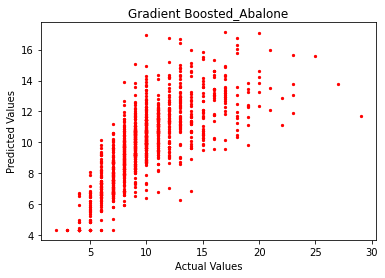

In [469]:
#~# Abalone Dataset #~#

gbt = GBTRegressor(featuresCol="indexedFeatures", maxIter=30, lossType='squared', featureSubsetStrategy='all')

pipeline_gbt = Pipeline(stages=[featureIndexer, gbt])
model_gbt = pipeline_gbt.fit(trainingData_ab)
predictions_gbt = model_gbt.transform(testData_ab)

rmse_gbt = evaluator.evaluate(predictions_gbt)

print("Gradient Boosted Tree (RMSE) = %g" % rmse_gbt)

treeModel_gbt = model_gbt.stages[1]
print(treeModel_gbt)
predictions_gbt.select("label", "prediction").sample(False, 0.1, 123).show(10)

r2_score = sklearn.metrics.r2_score(y_true, y_pred)
print('r2_score: {0}'.format(r2_score))

plt.scatter(y_true, y_pred, color = 'red', s=5)

plt.title("Gradient Boosted_Abalone")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

Isotonic Regression (RMSE) = 3.1454
+-----+----------+
|label|prediction|
+-----+----------+
|    4|       8.0|
|    7|       8.0|
|    6|       8.0|
|    7|       8.0|
|    6|       8.0|
|    9|       8.0|
|    7|       8.0|
|    7|       8.0|
|    7|       8.0|
|    7|       8.0|
+-----+----------+
only showing top 10 rows

r2_score: 0.5389171269920582


Text(0, 0.5, 'Predicted Values')

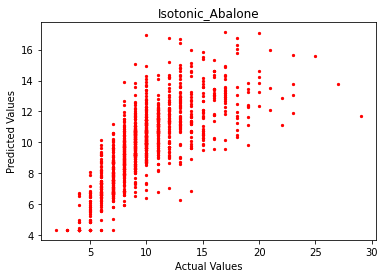

In [470]:
#~# Abalone Dataset #~#

iso = IsotonicRegression(featuresCol="indexedFeatures", isotonic=True)

pipeline_iso = Pipeline(stages=[featureIndexer, iso])
model_iso = pipeline_iso.fit(trainingData_ab)
predictions_iso = model_iso.transform(testData_ab)

rmse_iso = evaluator.evaluate(predictions_iso)

print("Isotonic Regression (RMSE) = %g" % rmse_iso)

predictions_iso.select("label", "prediction").sample(False, 0.1, 123).show(10)

r2_score = sklearn.metrics.r2_score(y_true, y_pred)
print('r2_score: {0}'.format(r2_score))

plt.scatter(y_true, y_pred, color = 'red', s=5)

plt.title("Isotonic_Abalone")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [0]:
#~# Abalone Dataset #~# #~# Abalone Dataset #~# #~# Abalone Dataset #~# #~# Abalone Dataset #~# #~# Abalone Dataset #~#

In [0]:
#~# Insurance Dataset #~# #~# Insurance Dataset #~# #~# Insurance Dataset #~# #~# Insurance Dataset #~# #~# Insurance Dataset #~#

+---+---+------+--------+------+------+-----------+
|age|sex|   bmi|children|smoker|region|    charges|
+---+---+------+--------+------+------+-----------+
| 19|  1|  27.9|       0|     1|     3|  16884.924|
| 18|  0| 33.77|       1|     0|     2|  1725.5523|
| 28|  0|  33.0|       3|     0|     2|   4449.462|
| 33|  0|22.705|       0|     0|     4|21984.47061|
| 32|  0| 28.88|       0|     0|     4|  3866.8552|
| 31|  1| 25.74|       0|     0|     2|  3756.6216|
| 46|  1| 33.44|       1|     0|     2|  8240.5896|
| 37|  1| 27.74|       3|     0|     4|  7281.5056|
| 37|  0| 29.83|       2|     0|     1|  6406.4107|
| 60|  1| 25.84|       0|     0|     4|28923.13692|
+---+---+------+--------+------+------+-----------+
only showing top 10 rows



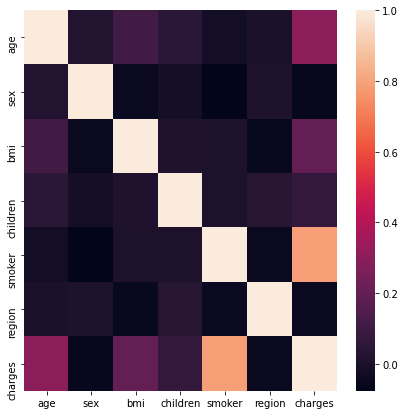

In [473]:
#~# Insurance Dataset #~#

Insurance_csv = spark.read.format('com.databricks.spark.csv').\
                              options(header='true', \
                              inferschema='true') \
                .load("/content/sample_data/insurance.csv",header=True);

Insurance_csv.show(10)

from pyspark.ml.stat import Correlation

data_in = pd.read_csv('/content/sample_data/insurance.csv')
plt.figure(figsize=(7,7)) 
sns.heatmap(data_in.corr())

In [474]:
#~# Insurance Dataset #~#

import six
for i in Insurance_csv.columns:
    if not( isinstance(Insurance_csv.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to Charges for ", i, "\t", Insurance_csv.stat.corr('charges',i))

Correlation to Charges for  age 	 0.299008193330648
Correlation to Charges for  sex 	 -0.05729206220202545
Correlation to Charges for  bmi 	 0.19834096883362906
Correlation to Charges for  children 	 0.06799822684790494
Correlation to Charges for  smoker 	 0.7872514304984765
Correlation to Charges for  region 	 -0.05022619604539937
Correlation to Charges for  charges 	 1.0


In [475]:
#~# Insurance Dataset #~#

drop_list_in = ['sex', 'region']

Insurance_csv = Insurance_csv.select([column for column in Insurance_csv.columns if column not in drop_list_in])
Insurance_csv.show(5)

+---+------+--------+------+-----------+
|age|   bmi|children|smoker|    charges|
+---+------+--------+------+-----------+
| 19|  27.9|       0|     1|  16884.924|
| 18| 33.77|       1|     0|  1725.5523|
| 28|  33.0|       3|     0|   4449.462|
| 33|22.705|       0|     0|21984.47061|
| 32| 28.88|       0|     0|  3866.8552|
+---+------+--------+------+-----------+
only showing top 5 rows



In [476]:
#~# Insurance Dataset #~#

def transData_in(data):
  return data.rdd.map(lambda r: [Vectors.dense(r[:-1]),r[-1]]).toDF(['features','label'])   

transformed_in = transData_in(Insurance_csv)

trainingData_in, testData_in = transformed_in.randomSplit([0.7, 0.3], seed = 100)
#transformed.sample(False, 0.1, 123).show(10)

Insurance_csv.count(),trainingData_in.count(),testData_in.count()

transformed_in.show(10)

+--------------------+-----------+
|            features|      label|
+--------------------+-----------+
| [19.0,27.9,0.0,1.0]|  16884.924|
|[18.0,33.77,1.0,0.0]|  1725.5523|
| [28.0,33.0,3.0,0.0]|   4449.462|
|[33.0,22.705,0.0,...|21984.47061|
|[32.0,28.88,0.0,0.0]|  3866.8552|
|[31.0,25.74,0.0,0.0]|  3756.6216|
|[46.0,33.44,1.0,0.0]|  8240.5896|
|[37.0,27.74,3.0,0.0]|  7281.5056|
|[37.0,29.83,2.0,0.0]|  6406.4107|
|[60.0,25.84,0.0,0.0]|28923.13692|
+--------------------+-----------+
only showing top 10 rows



In [0]:
#~# Insurance Dataset #~#

labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(transformed_in)
featureIndexer = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(transformed_in)
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel", labels=labelIndexer.labels)

Decision Tree (RMSE) = 4228.78
DecisionTreeRegressionModel (uid=DecisionTreeRegressor_7bab960b8052) of depth 5 with 63 nodes
+----------+------------------+
|     label|        prediction|
+----------+------------------+
|2207.69745| 2794.610627037036|
|33307.5508|17821.094107727276|
|  1875.344| 2794.610627037036|
| 2639.0429| 4188.357318918917|
|2395.17155| 2794.610627037036|
| 1986.9334| 2794.610627037036|
|  3208.787| 4188.357318918917|
|  2974.126| 4341.056531739131|
+----------+------------------+
only showing top 8 rows



Text(0, 0.5, 'Predicted Values')

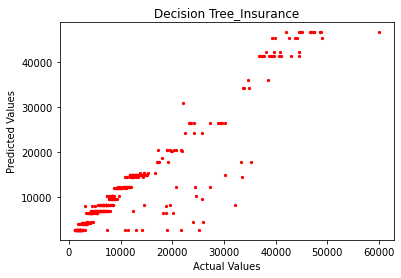

In [478]:
#~# Insurance Dataset #~#

dt = DecisionTreeRegressor(featuresCol="indexedFeatures", maxDepth=5)

pipeline_dt = Pipeline(stages=[featureIndexer, dt])
model_dt = pipeline_dt.fit(trainingData_in)
predictions_dt = model_dt.transform(testData_in)

rmse_dt = evaluator.evaluate(predictions_dt)

print("Decision Tree (RMSE) = %g" % rmse_dt)

treeModel_dt = model_dt.stages[1]
print(treeModel_dt)
predictions_dt.select("label", "prediction").sample(False, 0.1, 123).show(8)

y_true = predictions_dt.select("label").toPandas()
y_pred = predictions_dt.select("prediction").toPandas()

plt.scatter(y_true, y_pred, color = 'red', s=5)

plt.title("Decision Tree_Insurance")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

Random Forest Tree (RMSE) = 4156.67
RandomForestRegressionModel (uid=RandomForestRegressor_a1dc25cbd067) with 100 trees
+----------+------------------+
|     label|        prediction|
+----------+------------------+
|2207.69745|3921.3960937393053|
|33307.5508| 19552.67573392877|
|  1875.344| 3901.909016924505|
| 2639.0429| 5000.592160699974|
|2395.17155|3960.6194967154634|
| 1986.9334| 4894.183101068435|
|  3208.787| 4960.139788781979|
|  2974.126| 4625.770549116227|
|39611.7577| 38029.50257318887|
| 5428.7277| 7327.542108295923|
+----------+------------------+
only showing top 10 rows

r2_score: 0.879559979889162


Text(0, 0.5, 'Predicted Values')

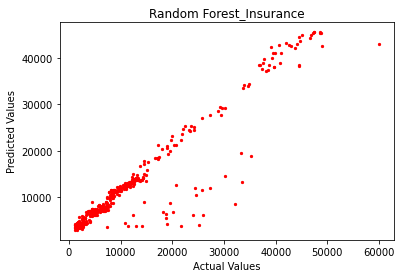

In [479]:
#~# Insurance Dataset #~#

rf = RandomForestRegressor(featuresCol="indexedFeatures", maxDepth=5, numTrees=100)

pipeline_rf = Pipeline(stages=[featureIndexer, rf])
model_rf = pipeline_rf.fit(trainingData_in)
predictions_rf = model_rf.transform(testData_in)

rmse_rf = evaluator.evaluate(predictions_rf)

print("Random Forest Tree (RMSE) = %g" % rmse_rf)

treeModel_rf = model_rf.stages[1]
print(treeModel_rf)
predictions_rf.select("label", "prediction").sample(False, 0.1, 123).show(10)

y_true = predictions_rf.select("label").toPandas()
y_pred = predictions_rf.select("prediction").toPandas()

r2_score = sklearn.metrics.r2_score(y_true, y_pred)
print('r2_score: {0}'.format(r2_score))

plt.scatter(y_true, y_pred, color = 'red', s=5)

plt.title("Random Forest_Insurance")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

Gradient Boosted Tree (RMSE) = 4699
GBTRegressionModel (uid=GBTRegressor_00d9ed207a4e) with 30 trees
+----------+------------------+
|     label|        prediction|
+----------+------------------+
|2207.69745|1695.8502480145532|
|33307.5508|17661.097413793785|
|  1875.344|  3153.67174970444|
| 2639.0429| 4284.744480784232|
|2395.17155| 2926.166808031291|
| 1986.9334|2971.9790317121347|
|  3208.787| 3564.389287950922|
|  2974.126| 5315.334061399122|
|39611.7577| 43888.46915046371|
| 5428.7277| 5671.664070202669|
+----------+------------------+
only showing top 10 rows

r2_score: 0.846081743392158


Text(0, 0.5, 'Predicted Values')

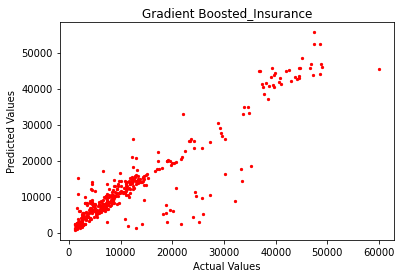

In [480]:
#~# Insurance Dataset #~#

gbt = GBTRegressor(featuresCol="indexedFeatures", maxIter=30, lossType='squared', featureSubsetStrategy='all')

pipeline_gbt = Pipeline(stages=[featureIndexer, gbt])
model_gbt = pipeline_gbt.fit(trainingData_in)
predictions_gbt = model_gbt.transform(testData_in)

rmse_gbt = evaluator.evaluate(predictions_gbt)

print("Gradient Boosted Tree (RMSE) = %g" % rmse_gbt)

treeModel_gbt = model_gbt.stages[1]
print(treeModel_gbt)
predictions_gbt.select("label", "prediction").sample(False, 0.1, 123).show(10)

y_true = predictions_gbt.select("label").toPandas()
y_pred = predictions_gbt.select("prediction").toPandas()

r2_score = sklearn.metrics.r2_score(y_true, y_pred)
print('r2_score: {0}'.format(r2_score))

plt.scatter(y_true, y_pred, color = 'red', s=5)

plt.title("Gradient Boosted_Insurance")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

Isotonic Regression (RMSE) = 11365.2
+----------+------------------+
|     label|        prediction|
+----------+------------------+
|2207.69745|         2304.0022|
|33307.5508|10536.250207041421|
|  1875.344|10536.250207041421|
| 2639.0429|10536.250207041421|
|2395.17155|10536.250207041421|
| 1986.9334|10536.250207041421|
|  3208.787|10536.250207041421|
|  2974.126|10605.687525357143|
|39611.7577|10605.687525357143|
| 5428.7277|10605.687525357143|
+----------+------------------+
only showing top 10 rows

r2_score: 0.09960112531601384


Text(0, 0.5, 'Predicted Values')

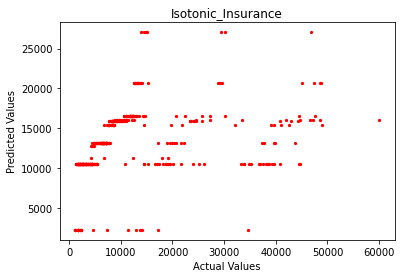

In [481]:
#~# Insurance Dataset #~#

iso = IsotonicRegression(featuresCol="indexedFeatures", isotonic=True)

pipeline_iso = Pipeline(stages=[featureIndexer, iso])
model_iso = pipeline_iso.fit(trainingData_in)
predictions_iso = model_iso.transform(testData_in)

rmse_iso = evaluator.evaluate(predictions_iso)

print("Isotonic Regression (RMSE) = %g" % rmse_iso)

predictions_iso.select("label", "prediction").sample(False, 0.1, 123).show(10)

y_true = predictions_iso.select("label").toPandas()
y_pred = predictions_iso.select("prediction").toPandas()

r2_score = sklearn.metrics.r2_score(y_true, y_pred)
print('r2_score: {0}'.format(r2_score))

plt.scatter(y_true, y_pred, color = 'red', s=5)

plt.title("Isotonic_Insurance")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [0]:
#~# Insurance Dataset #~# #~# Insurance Dataset #~# #~# Insurance Dataset #~# #~# Insurance Dataset #~# #~# Insurance Dataset #~#

In [0]:
#######################################################################################################

In [164]:
#drop_list = ['region', 'children', 'sex', 'smoker', 'bmi']

data_csv = data_csv.select([column for column in data_csv.columns if column not in drop_list])
data_csv.show(5)

NameError: ignored

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

abalone=pd.read_csv("/content/sample_data/Advertising.csv")
abalone_data.columns= ["TV", "Radio", "Newspaper", "Sales"]
#abalone.columns=[""Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings""]
aba_y = pd.DataFrame(abalone.Sales)
aba_x =pd.DataFrame(abalone["TV"])

abax_train, abax_test, abay_train, abay_test = train_test_split(aba_x, aba_y, 
                                                   test_size=0.3, 
                                                   random_state=42)
dt = DecisionTreeRegressor()
fit = dt.fit(abax_train,abay_train)

pred = dt.predict(abax_test)
plt.scatter(abay_test, pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

AttributeError: ignored